# Temporal search engine

## Histogram analysis

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

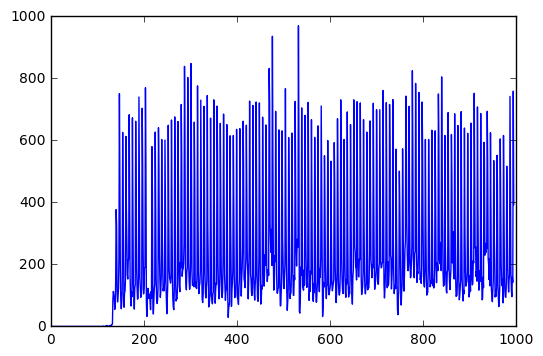

In [2]:
data = np.loadtxt('../results/search_dimanche.txt')
plt.plot(data)

/home/jonathan/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


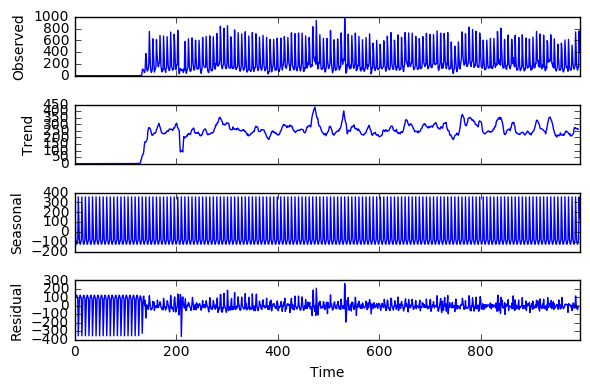

In [3]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(data, freq=7)
resplot = res.plot()

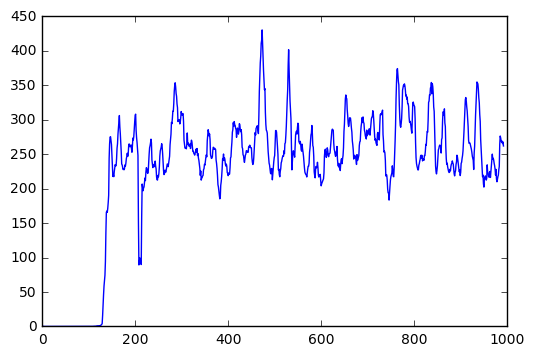

In [4]:
plt.plot(res.trend)

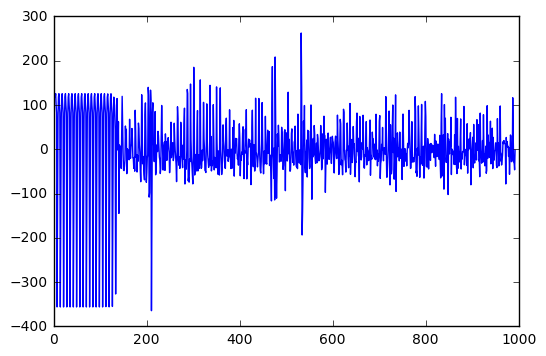

In [5]:
plt.plot(res.resid)

262.692211055
204.516538604


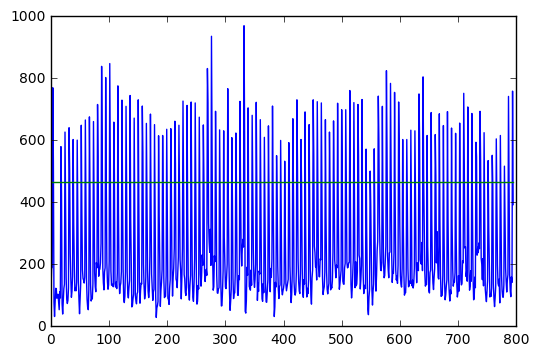

In [6]:
import math
math.isnan(res.resid[0])
ts = data[200:]

print(np.mean(ts))
print(np.sqrt(np.var(ts)))
thresh = np.mean(ts) + np.sqrt(np.var(ts))

plt.plot(ts)
plt.plot(thresh*np.ones(len(ts)))

## Events detection

In [7]:
import sys
sys.path.insert(0, '../src/')

from events_detection import *

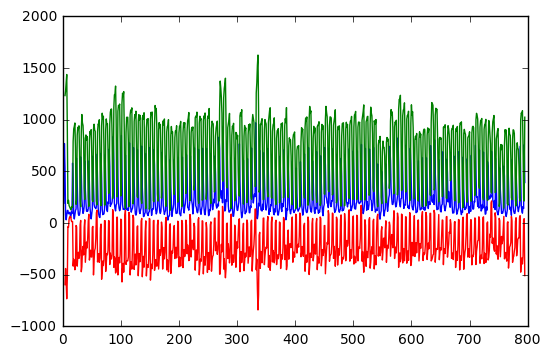

In [8]:
signal, avg, std = peaks_detection(ts, lag=5, thresh=3.5, influence=0.8)
plt.plot(ts)
plt.plot(avg+std*3.5)
plt.plot(avg-std*3.5)

[(17, 19),
 (24, 26),
 (31, 33),
 (38, 40),
 (45, 47),
 (52, 54),
 (59, 61),
 (66, 68),
 (73, 75),
 (80, 82),
 (87, 89),
 (94, 96)]

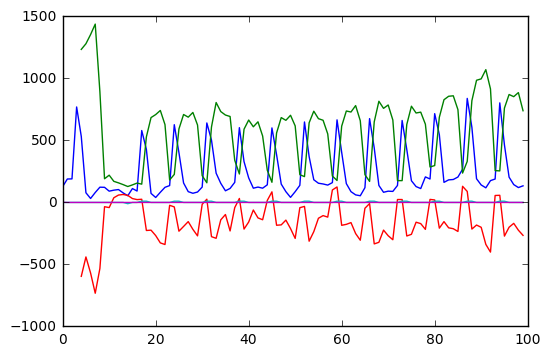

In [9]:
myts = ts[0:100]
mysignal, myavg, mystd = peaks_detection(myts)
plt.plot(myts)
plt.plot(myavg+mystd*3.5)
plt.plot(myavg-mystd*3.5)
plt.plot(mysignal*10)
plt.plot(res.observed[0:100])

events = events_list(mysignal)
events